In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [144]:
event = pd.read_excel("../../data/time series/카카오페이 ESG 활동 기사 배포 시점.xlsx")

In [145]:
event

,event,date,group
0,ESG 추진위원회,2022-05-24,외포괄
1,QR 재활용,2022-07-05,서집중
2,동네무료보험 서비스,2022-08-29,서포괄
3,금융사기 및 송금피해 예방,2022-09-07,서포괄
4,금융취약계층 응대 매뉴얼,2022-09-21,서집중
5,악성앱 탐지 솔루션 적용,2022-09-21,서포괄
6,상생기금 10억 조성,2022-09-27,외집중
7,금융소외계층 및 소상공인에 4억 기부,2022-10-04,외집중
8,영세중소상공인 수수료 우대,2022-10-05,서집중
9,UNGC 가입,2022-10-14,외포괄


"# of comments" visualization

In [146]:
news_comments_count = pd.read_csv("/home/mglee/VSCODE/git_folder/KakaoPay_ESG/data/time series/댓글 개수 날짜별 ts.csv ")

In [147]:
news_comments_count

,ymd,0
0,2017-01-01,1
1,2017-01-02,4
2,2017-01-05,2
3,2017-01-06,2
4,2017-01-10,2
...,...,...
2066,2023-01-09,1
2067,2023-01-10,1
2068,2023-01-12,2
2069,2023-01-14,3


In [148]:
news_comments_count['lag1'] = news_comments_count['0'] - news_comments_count['0'].shift(periods=1)

In [149]:
news_c_c_2022 = news_comments_count[news_comments_count['ymd'].apply(lambda x : '2022' in x)]

In [150]:
md = news_c_c_2022['ymd'].apply(lambda x : x[5:])

In [151]:
news_c_c_2022.reset_index(drop = True, inplace= True)

In [152]:
md.reset_index(drop=True, inplace=True)

In [153]:
event.dropna().sort_values('date')

,event,date,group
0,ESG 추진위원회,2022-05-24,외포괄
1,QR 재활용,2022-07-05,서집중
2,동네무료보험 서비스,2022-08-29,서포괄
3,금융사기 및 송금피해 예방,2022-09-07,서포괄
4,금융취약계층 응대 매뉴얼,2022-09-21,서집중
5,악성앱 탐지 솔루션 적용,2022-09-21,서포괄
6,상생기금 10억 조성,2022-09-27,외집중
7,금융소외계층 및 소상공인에 4억 기부,2022-10-04,외집중
8,영세중소상공인 수수료 우대,2022-10-05,서집중
9,UNGC 가입,2022-10-14,외포괄


서집중
서포괄
외집중
외포괄


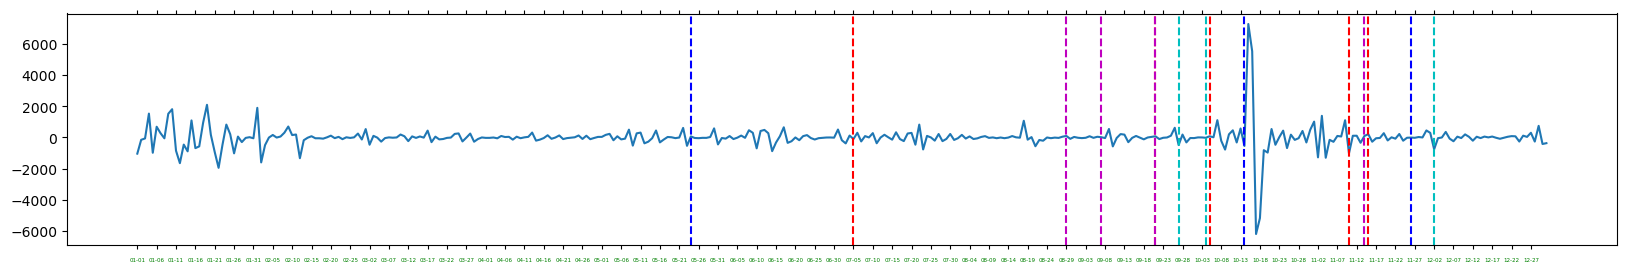

In [158]:
step_size = 5

xticks = np.arange(0, len(news_c_c_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_c_2022['lag1'])
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)

for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')


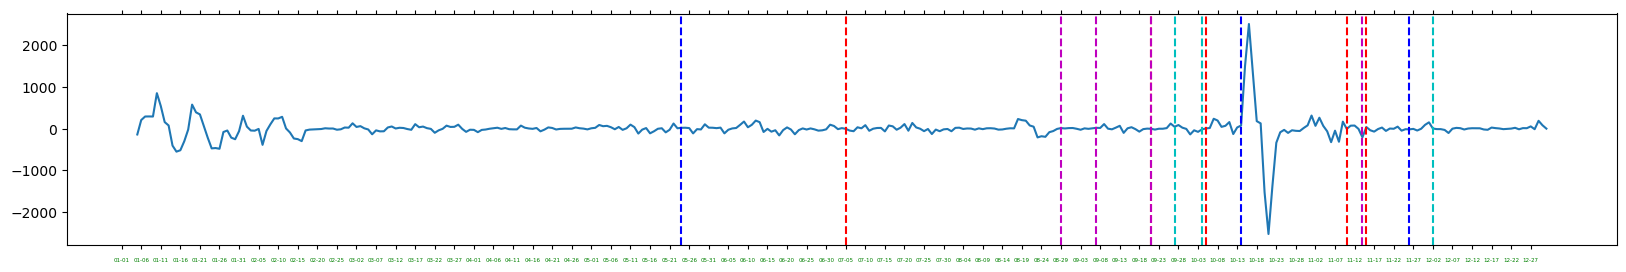

In [159]:
step_size = 5

xticks = np.arange(0, len(news_c_c_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_c_2022['lag1'], window = 5, center=False).mean())
plt.xticks(xticks, labels = md[xticks])
plt.tick_params(axis='x', length=3, pad=6, labelsize=4, labelcolor='green', top=True)


for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_c_2022[news_c_c_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')

#plt.axhline(news_c_c_2022['0'].mean(), color = 'y')

plt.savefig("../../result/fig/KP_c_count_lag1_w5.png", dpi = 1000)

"mean of sentiment" visualization

In [168]:
news_comments_senti = pd.read_csv("/home/mglee/VSCODE/git_folder/KakaoPay_ESG/data/time series/댓글 감성분석 날짜별 비율 ts.csv")

In [169]:
news_comments_senti['0'] = news_comments_senti['0'].replace(0, 0.01)
news_comments_senti['0'] = news_comments_senti['0'] * 100

In [170]:
#news_comments_senti['lag1'] = (news_comments_senti['0'] - news_comments_senti['0'].shift(periods=1)) /  news_comments_senti['0']
news_comments_senti['lag1'] = news_comments_senti['0']- news_comments_senti['0'].shift(periods=1)

In [128]:
# news_c_s_2022 = news_comments_senti

In [171]:
news_c_s_2022 = news_comments_senti[news_comments_senti['ymd'].apply(lambda x : '2022' in x)]

In [172]:
news_c_s_2022

,ymd,0,lag1
1693,2022-01-01,18.613139,-1.523639
1694,2022-01-02,16.528926,-2.084213
1695,2022-01-03,17.543860,1.014934
1696,2022-01-04,12.704403,-4.839457
1697,2022-01-05,10.909091,-1.795312
...,...,...,...
2053,2022-12-27,16.444444,-6.888889
2054,2022-12-28,18.918919,2.474474
2055,2022-12-29,14.930183,-3.988736
2056,2022-12-30,13.333333,-1.596849


In [173]:
mds = news_c_s_2022['ymd'].apply(lambda x : x[5:])

In [174]:
news_c_s_2022.reset_index(drop = True, inplace= True)
mds.reset_index(drop=True, inplace=True)

In [175]:
mds

0      01-01
1      01-02
2      01-03
3      01-04
4      01-05
       ...  
360    12-27
361    12-28
362    12-29
363    12-30
364    12-31
Name: ymd, Length: 365, dtype: object

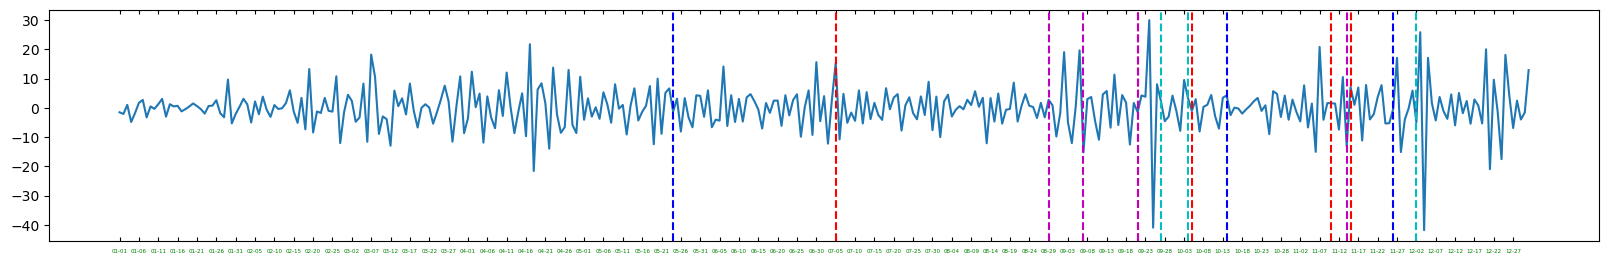

In [176]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_s_2022['lag1'])
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)



for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')
    
#plt.savefig("../../result/fig/KP_c_senti_lag1.png", dpi = 1000)

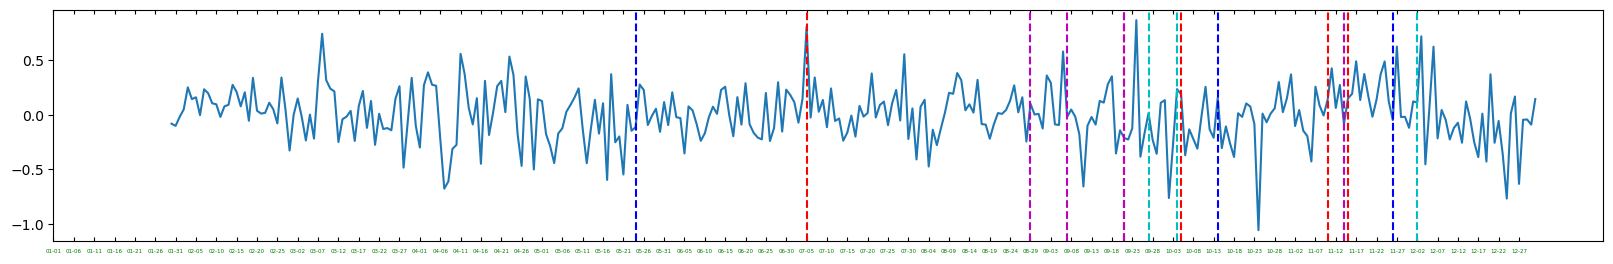

In [177]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_s_2022['lag1'], window = 30, center=False).mean())
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)



for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')
    
#plt.savefig("../../result/fig/KP_c_senti_lag1_w30.png", dpi = 1000)

In [178]:
news_c_s_2022['0'].mean()

17.776401527074565

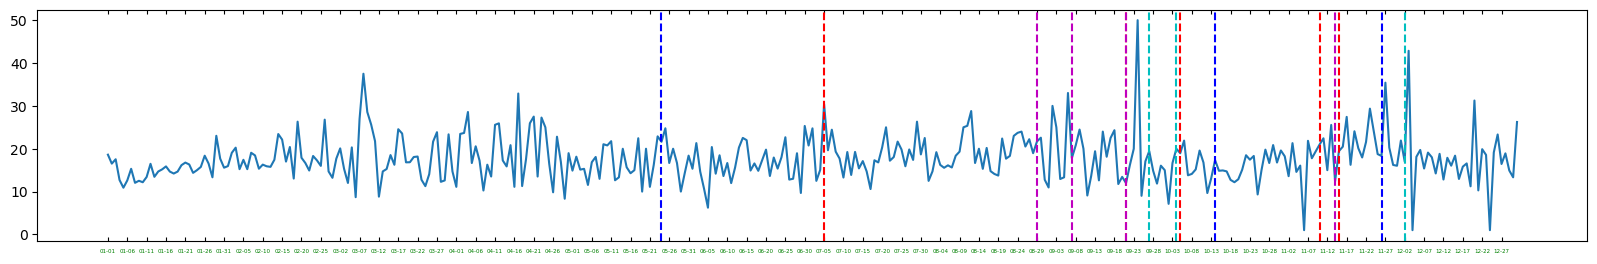

In [179]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(news_c_s_2022['0'])
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)



for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')
    
#plt.savefig("../../result/fig/KP_c_senti_lag1.png", dpi = 1000)

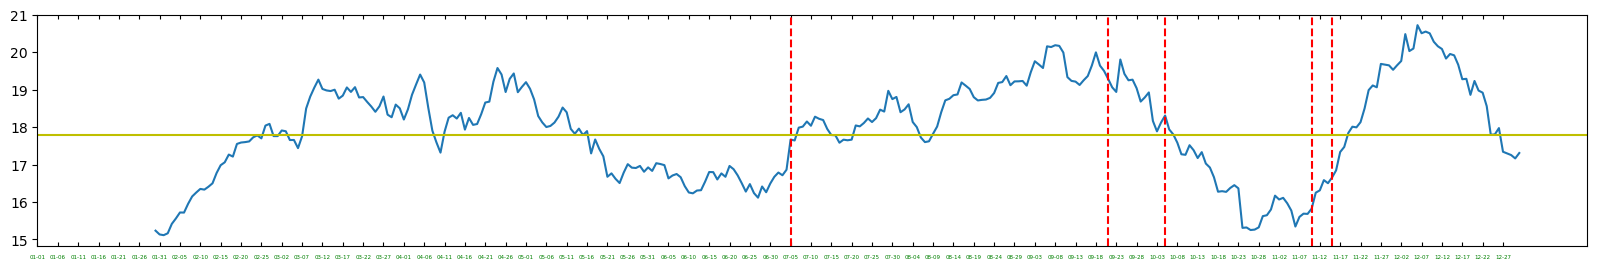

In [180]:
step_size = 5

xticks = np.arange(0, len(news_c_s_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(pd.Series.rolling(news_c_s_2022['0'], window = 30, center=False).mean())
plt.xticks(xticks, labels = mds[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)



for g, c in zip(event.groupby('group'), ['r', 'm' ,'c', 'b']):
    for _, row in g[1].iterrows():
        line_idx = news_c_s_2022[news_c_s_2022['ymd'] == str(row['date'])[:-9]].index
        plt.axvline(line_idx, color = c, linestyle = '--')
    break
    
plt.axhline(news_c_s_2022['0'].mean(), color = 'y')
#plt.savefig("../../result/fig/KP_c_senti_w30.png", dpi = 1000)


카카오추세 제거

주가 데이터

In [71]:
stock = pd.read_csv("../../data/time series/카카오페이 주식 ts.csv")

In [72]:
stock_2022 = stock[stock['Date'].apply(lambda x : '2022' in x)]

In [73]:
stock_2022.reset_index(drop=True, inplace=True)

In [74]:
stock_2022['ymd'] = stock_2022.Date.apply(lambda x : x[5:])

In [75]:
stock_md = stock_2022['ymd']

In [76]:
stock_md

0      11-03
1      11-04
2      11-05
3      11-08
4      11-09
       ...  
317    02-14
318    02-15
319    02-16
320    02-17
321    02-20
Name: ymd, Length: 322, dtype: object

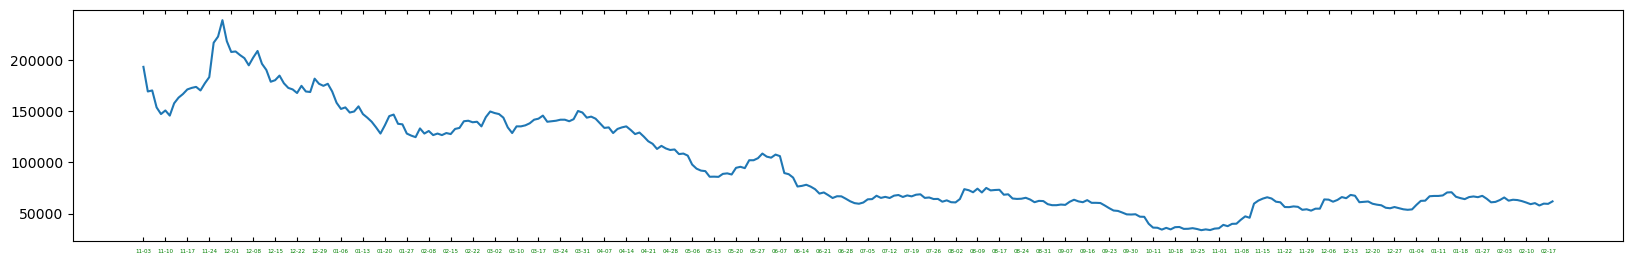

In [77]:
step_size = 5

xticks = np.arange(0, len(stock_2022['ymd']), step_size)

plt.figure(figsize=(20,3))
plt.plot(stock_2022['Close'])
plt.xticks(xticks, labels = stock_md[xticks])
plt.tick_params(axis='x', direction='in', length=3, pad=6, labelsize=4, labelcolor='green', top=True)
